In [43]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [14]:
def str_to_list(strlist):
    return literal_eval(strlist)

### CC에 대한 topk 분석

In [6]:
cc_result = pd.read_csv("../../samsung/sykim/prefetch_2024/sykim/cc_clstm/results/result_addr.csv")

In [15]:
cc_result['pred'] = cc_result['pred'].apply(str_to_list)

In [20]:
cc_result['target'] = cc_result['target'].apply(str)

In [34]:
cc_topk_dict = dict()

# 모든 행에 대해 target이 pred의 몇번째 인덱스에 존재하는지 찾기
for idx, row in cc_result.iterrows():
    if row['target'] not in row['pred']: continue
    k = row['pred'].index(row['target'])
    # print(k)
    if k not in cc_topk_dict.keys():
        cc_topk_dict[k] = 1
    # print(topk_dict.keys())
    else: cc_topk_dict[k] = cc_topk_dict[k]+1

In [36]:
cc_topk_dict

{3: 79612,
 5: 53725,
 9: 17401,
 0: 84410,
 19: 7441,
 13: 10757,
 10: 14801,
 14: 9860,
 15: 8935,
 2: 85567,
 6: 38603,
 1: 81604,
 4: 69891,
 8: 21660,
 11: 13037,
 7: 27772,
 18: 7612,
 12: 11808,
 16: 8142,
 17: 8031}

In [41]:
none = 1000000
for key, val in cc_topk_dict.items():
    none -= val
print(none)
cc_topk_dict['none'] = none

339331


In [42]:
cc_topk_dict

{3: 79612,
 5: 53725,
 9: 17401,
 0: 84410,
 19: 7441,
 13: 10757,
 10: 14801,
 14: 9860,
 15: 8935,
 2: 85567,
 6: 38603,
 1: 81604,
 4: 69891,
 8: 21660,
 11: 13037,
 7: 27772,
 18: 7612,
 12: 11808,
 16: 8142,
 17: 8031,
 'none': 339331}

In [81]:
x = list(range(0,20))
x.append('none')
y = list()
cum = list()
perc = 0
for key in x:
    if key in cc_topk_dict.keys():
        y.append(cc_topk_dict[key]/1000000 * 100)
        perc += cc_topk_dict[key]/1000000 * 100
        cum.append(perc)
    else:
        y.append(0)
x = [x_data+1 for x_data in x if x_data!='none']
x.append('none')

In [84]:
x = [str(x_data) for x_data in x]
print(x)
print(y)
print(cum)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'none']
[8.441, 8.1604, 8.556700000000001, 7.9612, 6.9891, 5.3725000000000005, 3.8602999999999996, 2.7772, 2.166, 1.7401, 1.4801, 1.3037, 1.1808, 1.0756999999999999, 0.9860000000000001, 0.8935000000000001, 0.8142, 0.8031, 0.7612, 0.7441, 33.933099999999996]
[8.441, 16.601399999999998, 25.158099999999997, 33.119299999999996, 40.108399999999996, 45.4809, 49.3412, 52.1184, 54.2844, 56.024499999999996, 57.504599999999996, 58.808299999999996, 59.98909999999999, 61.06479999999999, 62.05079999999999, 62.94429999999999, 63.75849999999999, 64.56159999999998, 65.32279999999999, 66.06689999999999, 99.99999999999999]


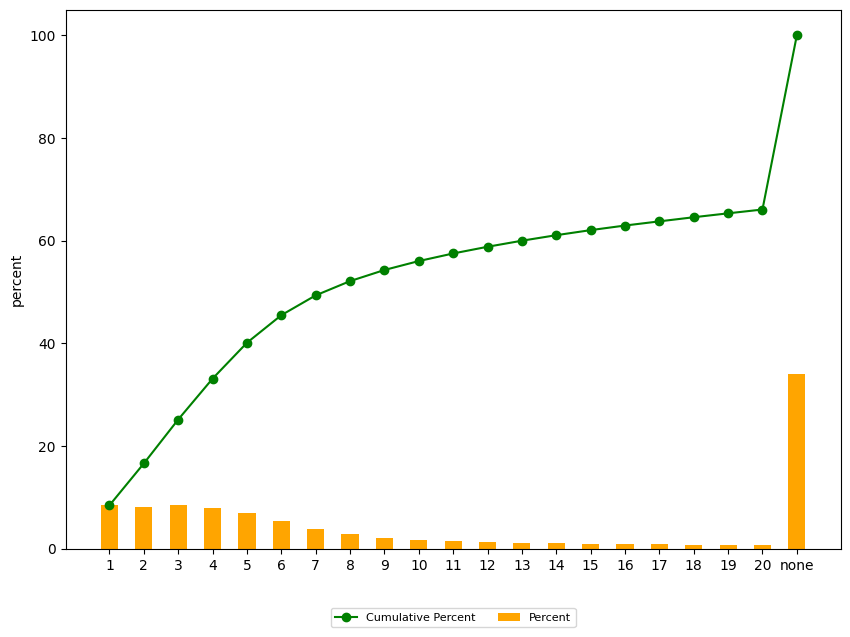

In [98]:
plt.figure(figsize=(10,7))

plt.bar(x, y, color='orange', width=0.5, label='Percent')

plt.plot(x, cum, color='green', linestyle='-', marker='o', label='Cumulative Percent')

plt.ylabel('percent')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6, fontsize=8)
# plt.tight_layout()
plt.savefig('cc_topk.png', format='png')

### PR에 대한 top/k 분석

In [7]:
pr_result = pd.read_csv("../../samsung/sykim/prefetch_2024/sykim/pr_clstm/results/result_addr.csv")

In [16]:
pr_result['pred'] = pr_result['pred'].apply(str_to_list)

In [22]:
pr_result['target'] = pr_result['target'].apply(str)

In [35]:
pr_topk_dict = dict()

# 모든 행에 대해 target이 pred의 몇번째 인덱스에 존재하는지 찾기
for idx, row in pr_result.iterrows():
    if row['target'] not in row['pred']: continue
    k = row['pred'].index(row['target'])
    # print(k)
    if k not in pr_topk_dict.keys():
        pr_topk_dict[k] = 1
    # print(topk_dict.keys())
    else: pr_topk_dict[k] = pr_topk_dict[k]+1

In [37]:
pr_topk_dict

{0: 50899,
 11: 29298,
 3: 45539,
 7: 44128,
 1: 46936,
 2: 45648,
 17: 13258,
 18: 11564,
 6: 46033,
 4: 46154,
 8: 41353,
 5: 46970,
 9: 37371,
 12: 25490,
 15: 16828,
 10: 33366,
 14: 19060,
 13: 22287,
 16: 14947,
 19: 10455}

In [99]:
none = 1000000
for key, val in pr_topk_dict.items():
    none -= val
print(none)
pr_topk_dict['none'] = none

352416


In [100]:
x = list(range(0,20))
x.append('none')
y = list()
cum = list()
perc = 0
for key in x:
    if key in pr_topk_dict.keys():
        y.append(pr_topk_dict[key]/1000000 * 100)
        perc += pr_topk_dict[key]/1000000 * 100
        cum.append(perc)
    else:
        y.append(0)
x = [x_data+1 for x_data in x if x_data!='none']
x.append('none')

In [101]:
x = [str(x_data) for x_data in x]
print(x)
print(y)
print(cum)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'none']
[5.0899, 4.6936, 4.5648, 4.5539000000000005, 4.6154, 4.697, 4.6033, 4.4128, 4.1353, 3.7371000000000003, 3.3366, 2.9298, 2.549, 2.2287, 1.9060000000000001, 1.6827999999999999, 1.4947, 1.3258, 1.1563999999999999, 1.0455, 35.2416]
[5.0899, 9.7835, 14.3483, 18.9022, 23.5176, 28.2146, 32.8179, 37.2307, 41.366, 45.1031, 48.439699999999995, 51.369499999999995, 53.918499999999995, 56.1472, 58.0532, 59.736, 61.2307, 62.5565, 63.7129, 64.7584, 100.0]


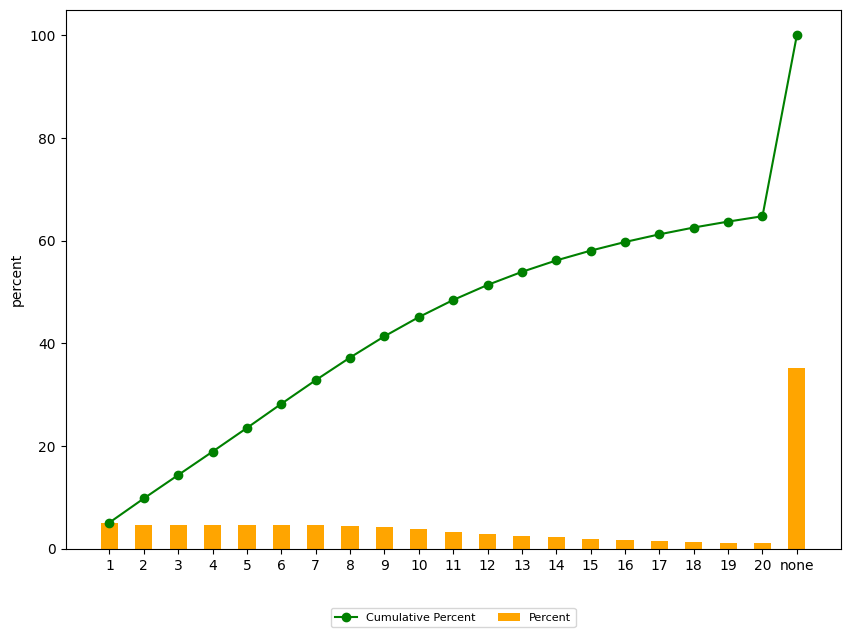

In [102]:
plt.figure(figsize=(10,7))

plt.bar(x, y, color='orange', width=0.5, label='Percent')

plt.plot(x, cum, color='green', linestyle='-', marker='o', label='Cumulative Percent')

plt.ylabel('percent')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6, fontsize=8)
# plt.tight_layout()
plt.savefig('pr_topk.png', format='png')